In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
import numpy as np
import pyross
import matplotlib.pyplot as plt

In [3]:
M  = 2                  # age groups
fA = np.array((0.25, 0.75)) 

Ni =  np.zeros((M))   # population in each group
for i in range(M):
    Ni[i] = int(fA[i]*1000000)
N  = np.sum(Ni)  


Ia_0, Is_0, R_0 = np.array((1., 1)), 0.*np.array((1, 1)), 0.*np.array((1, 1))
S_0 = Ni - Ia_0 - R_0 - Is_0

alpha, gamma, r0 = 1, 1./3, 1.5

C = np.array(([18., 9.], [3., 12.]))

transProb = 1  
if transProb==1:
    L = np.zeros((M, M))
    L[0,0] = C[0,0]*Ni[0]/Ni[0]
    L[0,1] = C[0,1]*Ni[0]/Ni[1]
    L[1,0] = C[1,0]*Ni[1]/Ni[0]
    L[1,1] = C[1,1]*Ni[1]/Ni[1]
    beta = r0*gamma/np.max(np.linalg.eigvals(L))
else:
    beta=0.05
beta

0.023809523809523808

In [4]:
fsa=0
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni)

In [5]:
Tf=200; filename='this.mat'
model.simulate(Tf, C, filename)

In [6]:
from scipy.io import loadmat
data=loadmat(filename)
IaK = data['X'][:,M].flatten()
IaA = data['X'][:,M+1].flatten()
t = data['t'][0] 

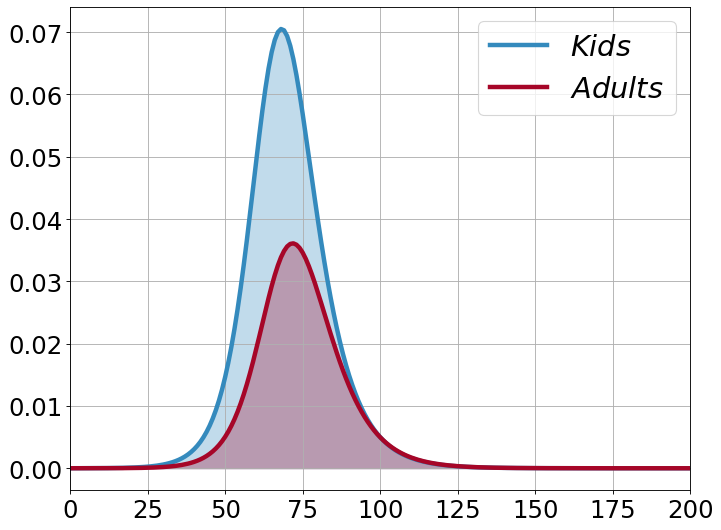

In [7]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, IaK/Ni[0], color="#348ABD", alpha=0.3)
plt.plot(t, IaK/Ni[0], '-', color="#348ABD", label='$Kids$', lw=4)

plt.fill_between(t, 0, IaA/Ni[1], color='#A60628', alpha=0.3)
plt.plot(t, IaA/Ni[1], '-', color='#A60628', label='$Adults$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)

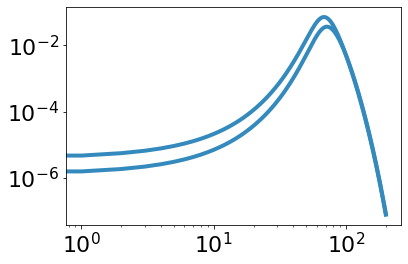

In [8]:
plt.loglog(t, IaK/Ni[0], '-', color="#348ABD", label='$Kids$', lw=4)
plt.loglog(t, IaA/Ni[1], '-', color="#348ABD", label='$Kids$', lw=4)

In [9]:
from scipy.linalg import expm


Nt=5#int(np.size(t)/4)
pp = np.zeros((Nt, M))
for i in range(Nt):
    pp[i,:]=expm(gamma*(L-1)*i)[0,0]
    

In [10]:
pp

array([[1.00000000e+00, 1.00000000e+00],
       [4.54441297e+02, 4.54441297e+02],
       [2.53683124e+05, 2.53683124e+05],
       [1.42787461e+08, 1.42787461e+08],
       [8.03927783e+10, 8.03927783e+10]])